In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [7]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta


# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#remove
from sqlalchemy import Column, Integer, String, Float


In [9]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [10]:
# Declare a Base using `automap_base()`
base = automap_base()

# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)



In [11]:
# Print all of the classes mapped to the Base
base.classes.keys()

['measurement', 'station']

In [12]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = base.classes.measurement
Station = base.classes.station



# class Measurement(base):
#     __tablename__ = 'measurement'
#     id = Column(Integer, primary_key = True)
#     station = Column(String(255))
#     date = Column(String(255))
#     prcp = (Float)
#     tobs = (Float)

# class Station(base):
#     id = Column(Integer, primary_key = True)
#     station = Column(String(255))
#     name = Column (String(255))
#     latitude = Column(Float)
#     longitude = Column(Float)
#     elevation = Column(Float)

In [13]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = most_recent_date[0]
print(most_recent_date)

2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
print(most_recent_date)
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
last_year_date = most_recent_date - timedelta(days=365)
print(last_year_date)





2017-08-23
2016-08-23 00:00:00


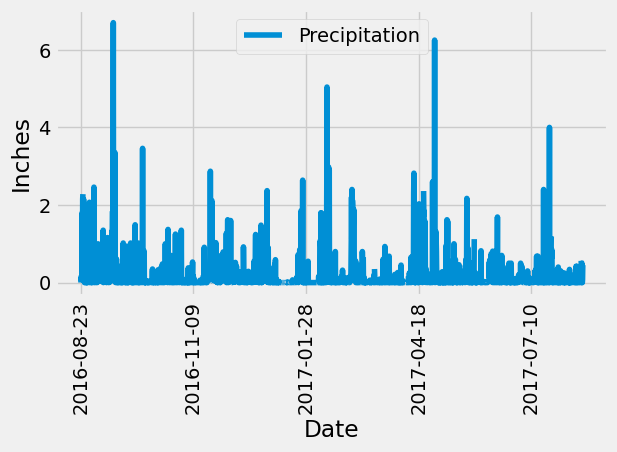

In [ ]:
# Perform a query to retrieve the data and precipitation scores
over_last_year_prcp_query = f'SELECT date, prcp FROM Measurement WHERE date > "2016-08-22" ORDER BY date;'


# Save the query results as a Pandas DataFrame. Explicitly set the column names
over_last_year_prcp_df = pd.read_sql_query(over_last_year_prcp_query, engine)
over_last_year_prcp_df = over_last_year_prcp_df.rename(columns={'date' : 'Date',
                                                                'prcp' : 'Precipitation',
                                                                })


# Sort the dataframe by date
#   *Already Sorted*

# Use Pandas Plotting with Matplotlib to plot the data
ax = over_last_year_prcp_df.plot(x = 'Date', y= 'Precipitation')
plt.xticks(rotation = 90)
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
over_last_year_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
station_count


9

In [76]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count_entries = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count_entries




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_count_entries[0]
most_active_station = str(most_active_station).split(',')
most_active_station = most_active_station[0]
most_active_station = most_active_station.replace('(','')
most_active_station = most_active_station.replace("'",'')
print(most_active_station)

active_station_low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
active_station_high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
active_station_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f'Low: {active_station_low}, High: {active_station_high}, Avg: {active_station_avg}')










USC00519281
Low: [(54.0,)], High: [(85.0,)], Avg: [(71.66378066378067,)]


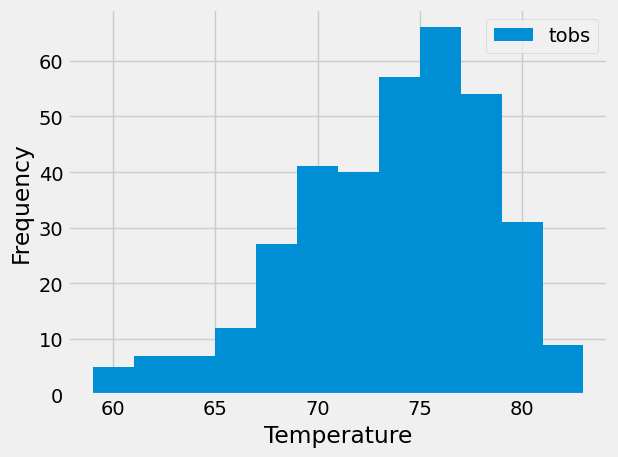

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#pulling last date
most_recent_by_active = session.query(Measurement.date).filter(Measurement.station == most_active_station)\
    .order_by(Measurement.date.desc()).first()
most_recent_by_active = most_recent_by_active[0]

#calculating 12 months prior to recent date
most_recent_date = dt.datetime.strptime(most_recent_by_active, '%Y-%m-%d')
last_year_date = most_recent_date - timedelta(days=365)

#creating dataframe
most_active_over_year = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_year_date)\
    .filter(Measurement.station == most_active_station).all()

most_active_over_year_df = pd.DataFrame(most_active_over_year)


#histogram
ax2 = most_active_over_year_df.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.title('')
plt.tight_layout()
plt.show()


# Close Session

In [120]:
# Close Session
session.close()
